gradiente [-0.6300000000000001, -0.87, -1.04]; posicion [0.5 1.  1.5]


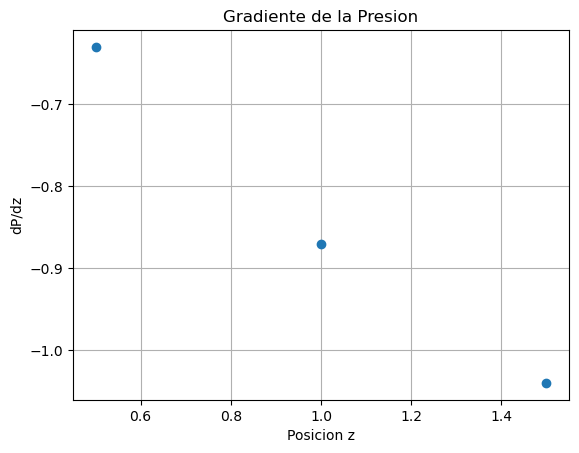

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def difer(x,y,tipo=0,orden=1):
    # tipo = (-1:Diferecia hacia atras, 0:Centrada,1:Diferencia hacia adelante )
    # orden = (1:Primer orden, 2:Segundo orden)
    
    n=x.size
    if tipo==-1: #Diferencias hacia atras
        if orden==1:
            return [(y[i]-y[i-1])/(x[i]-x[i-1])\
                    for i in range(1,n)]
        elif orden==2:
            return [(y[i]-2*y[i-1]+y[i-2])/(x[i]-x[i-1])**2\
                    for i in range(2,n)]
        else:
            raise ValueError ('Parametro <Orden> incorrecto')
    elif tipo==0: #Diferencias centradas
        if orden==1:
            return [(y[i+1]-y[i-1])/(x[i]-x[i-1])/2\
                    for i in range(1,n-1)]
        elif orden==2:
            return [(y[i+1]-2*y[i]+y[i-1])/(x[i]-x[i-1])**2\
                    for i in range(1,n-1)]
        else:
            raise ValueError ('Parametro <Orden> incorrecto')
    elif tipo==1: #Diferencias hacia adelante
        if orden==1:
            return [(y[i+1]-y[i])/(x[i+1]-x[i])\
                    for i in range(0,n-1)]
        elif orden==2:
            return [(y[i+2]-2*y[i+1]+y[i])/(x[i]-x[i-1])**2\
                    for i in range(0,n-2)]
        else:
            raise ValueError ('Parametro <Orden> incorrecto')
    else:
        raise ValueError ('Parametro <Tipo> incorrecto')

def main():
    # valores de posicion
    x=np.array([0,0.5,1.0,1.5,2.0])
    # valores de presion
    y=np.array([1.82,1.48,1.19,0.61,0.15])
    # Llamada al algoritmo
    d=difer(x,y,tipo=0,orden=1)
    print('gradiente {}; posicion {}'.format(d,x[1:4]))
    
    fig = plt.figure()
    plt.plot(x[1:4],d,'o')
    plt.title('Gradiente de la Presion')
    plt.xlabel('Posicion z')
    plt.ylabel('dP/dz')
    plt.grid()
    
    plt.show()
    fig.savefig("difer.pdf", bbox_inches='tight')
    
if __name__ == "__main__": main()